<a href="https://colab.research.google.com/github/KIRTIRAJ4327/30days-AI-challenge/blob/main/Day29_The_Smart_Fitness_Plan_Generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Core Concept**

This project focuses on personalized planning systems, specifically creating a tool that generates custom workout plans based on individual goals and constraints.

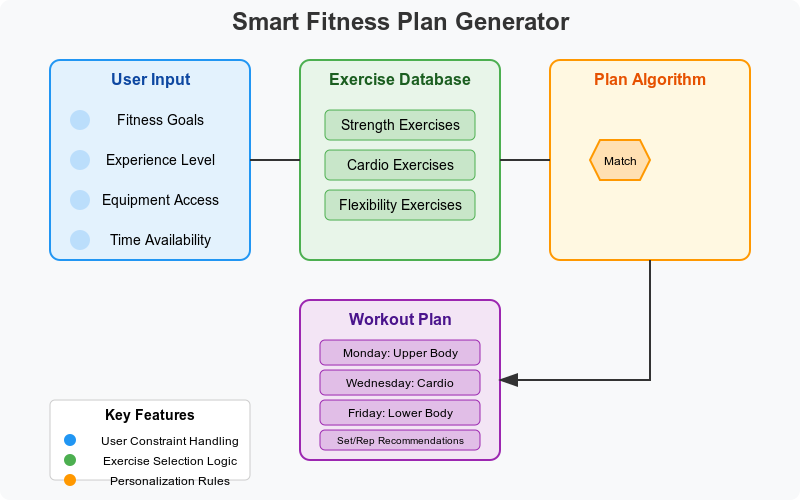

**The Smart Fitness Plan Generator project** creates personalized workout routines based on our specific needs.

**For example,** if you input that you're a beginner with 30 minutes available 3 days a week, no equipment, and want to lose weight, the program would analyze an exercise database and generate a plan like: "Monday: 5-min warm-up, 20-min circuit of bodyweight exercises (jumping jacks, push-ups, squats), 5-min cool-down; Wednesday: 5-min warm-up, 20-min HIIT routine, 5-min stretching; Friday: 5-min warm-up, 20-min core and lower body focus, 5-min cool-down." The system applies constraints (time, equipment, experience level) to select appropriate exercises that match your goals while creating a balanced routine.

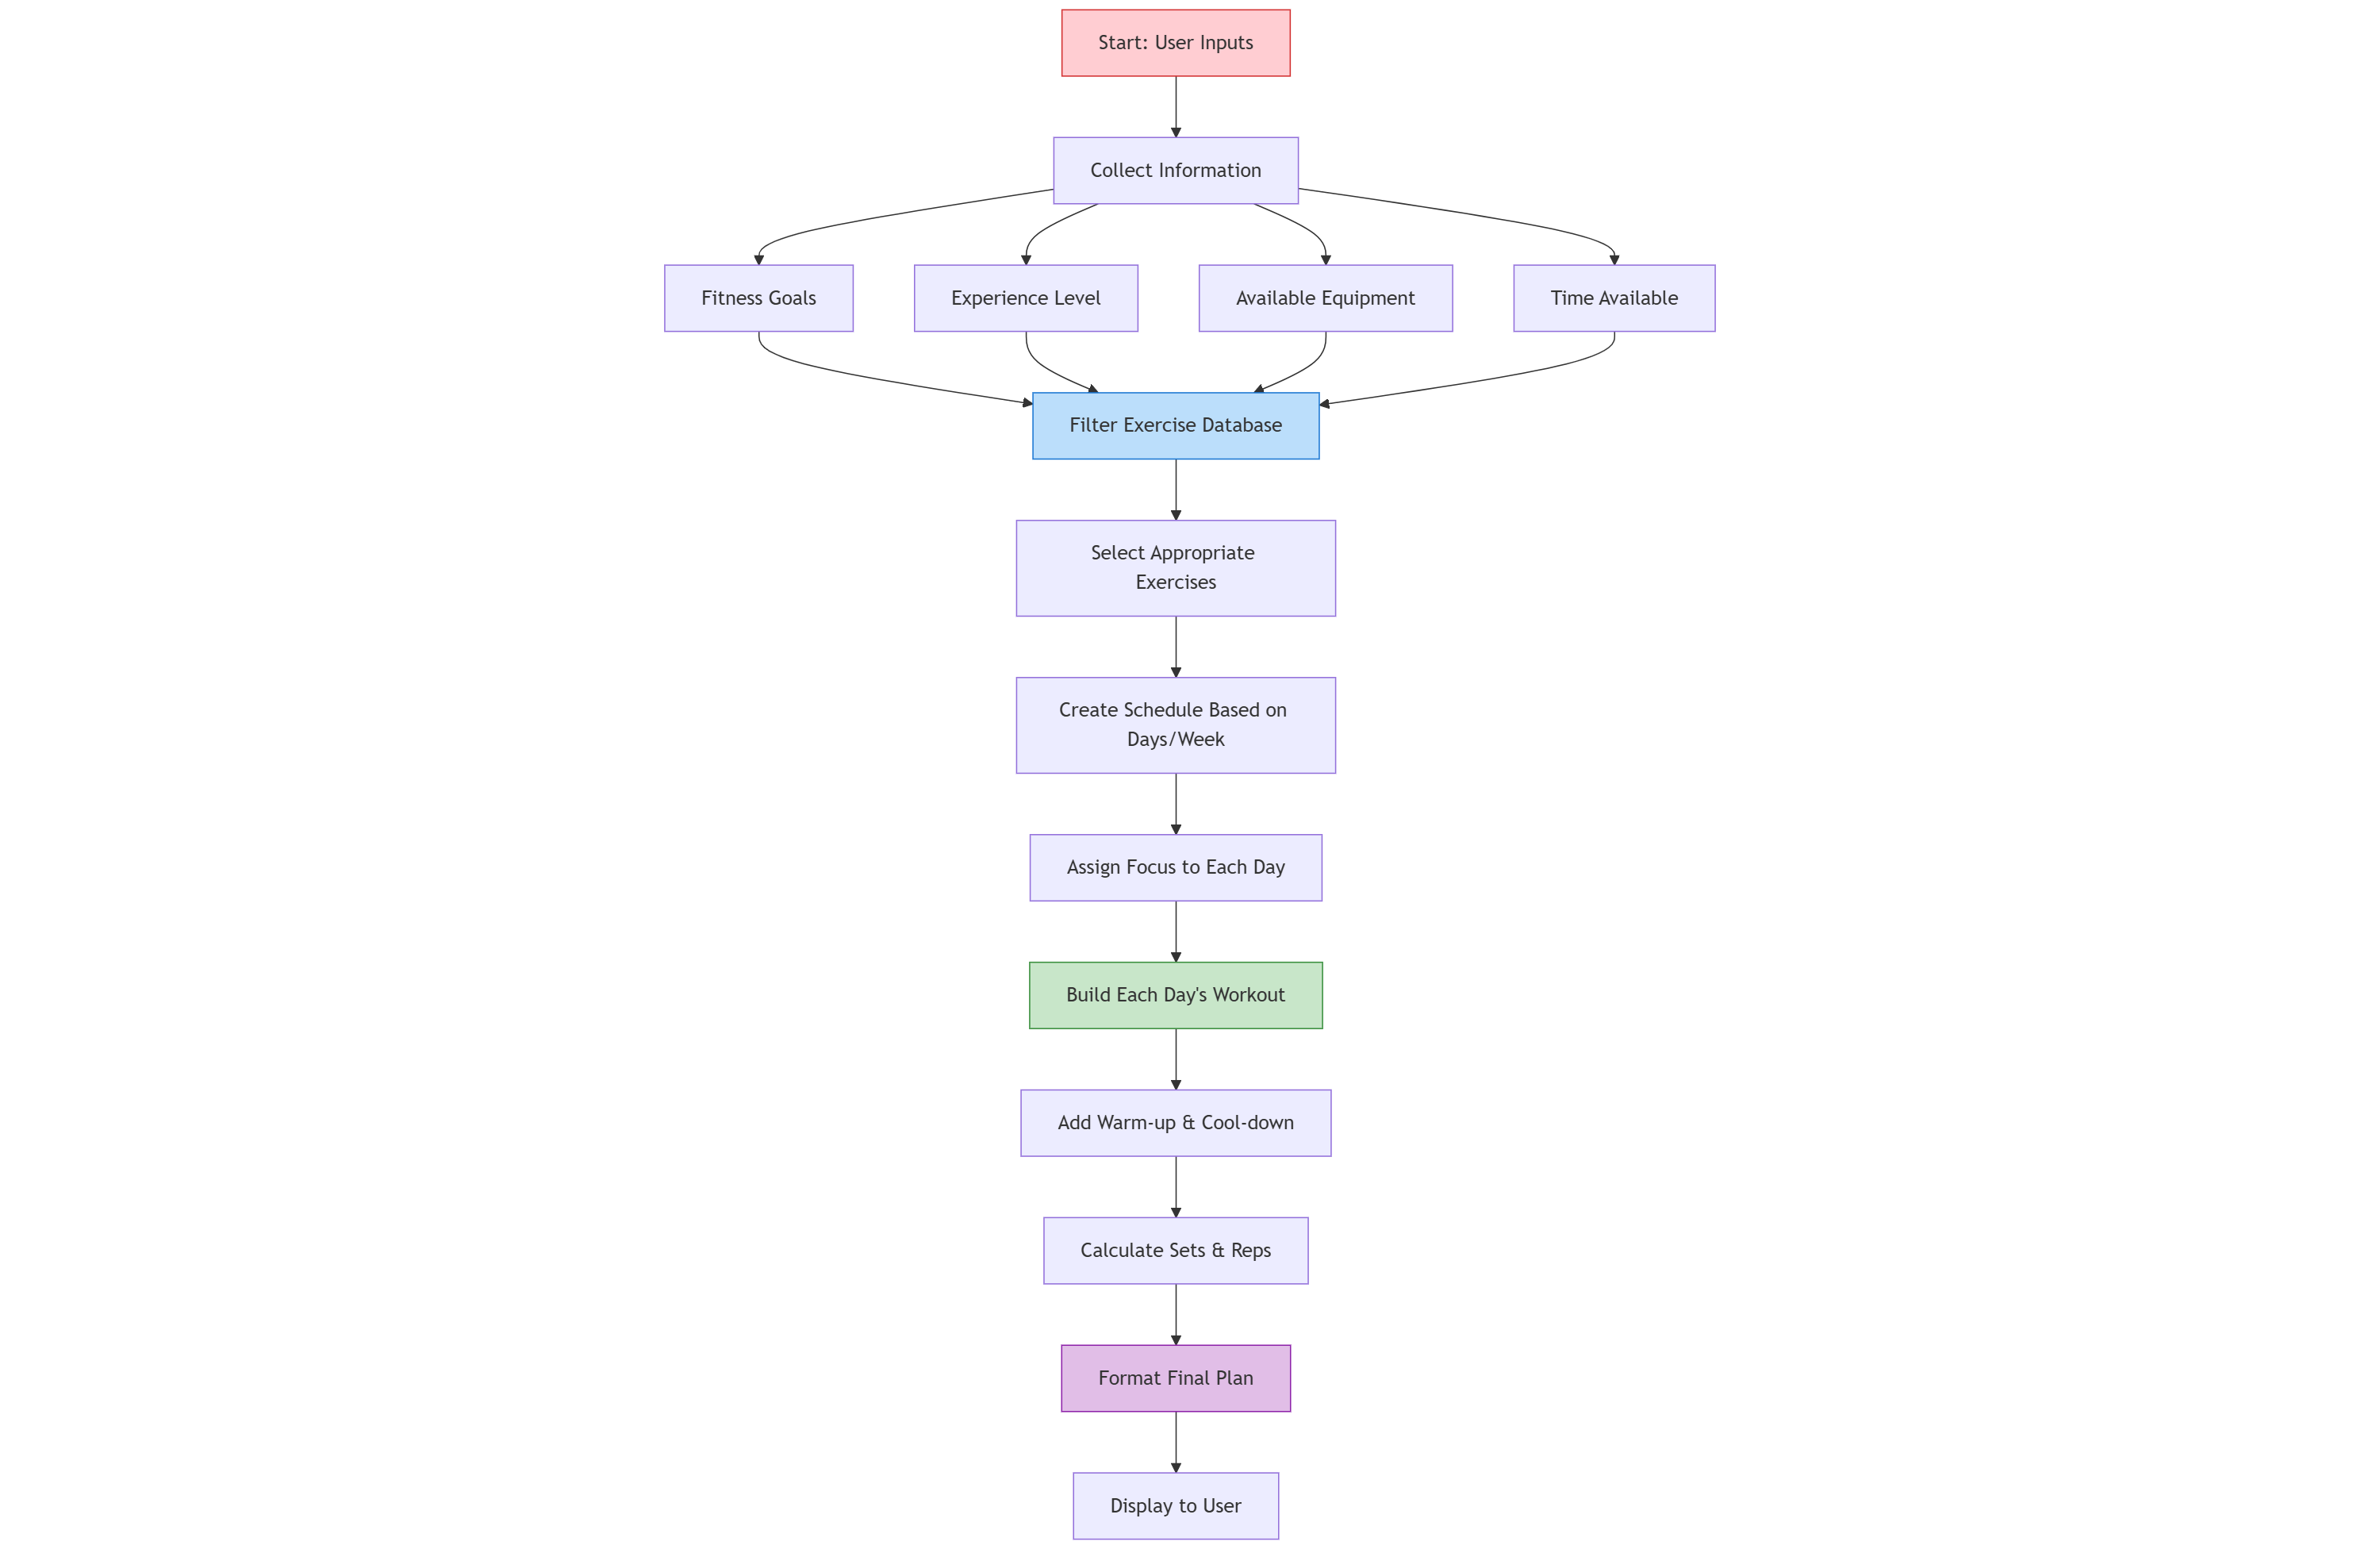

**Set Up Your Environment**

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import random
import json

**Create an Exercise Database**

In [2]:
# Create a simple exercise database
exercises = [
    {
        "name": "Push-ups",
        "type": "strength",
        "muscle_group": "chest",
        "equipment": "none",
        "difficulty": "beginner",
        "time_required": 5,
        "description": "Place hands shoulder-width apart, lower body until chest nearly touches floor, then push back up."
    },
    {
        "name": "Squats",
        "type": "strength",
        "muscle_group": "legs",
        "equipment": "none",
        "difficulty": "beginner",
        "time_required": 5,
        "description": "Stand with feet shoulder-width apart, lower your body as if sitting in a chair, then return to standing."
    },
    {
        "name": "Plank",
        "type": "core",
        "muscle_group": "abs",
        "equipment": "none",
        "difficulty": "beginner",
        "time_required": 3,
        "description": "Hold a push-up position with arms straight, keeping your body in a straight line from head to heels."
    },
    # Add more exercises as needed
]

# Convert to DataFrame for easier manipulation
exercise_df = pd.DataFrame(exercises)

**Create User Input Functions**

In [3]:
def get_user_preferences():
    """Collect user preferences for workout plan"""

    print("Welcome to the Smart Fitness Plan Generator!")
    print("Let's create a personalized workout plan for you.")

    # Fitness goal
    print("\nWhat is your fitness goal?")
    print("1. Weight loss")
    print("2. Muscle building")
    print("3. Endurance")
    print("4. General fitness")
    goal = int(input("Enter the number of your goal: "))

    # Experience level
    print("\nWhat is your fitness level?")
    print("1. Beginner")
    print("2. Intermediate")
    print("3. Advanced")
    level = int(input("Enter the number of your fitness level: "))

    # Available equipment
    print("\nWhat equipment do you have access to?")
    print("1. None (bodyweight only)")
    print("2. Basic (dumbbells, resistance bands)")
    print("3. Full gym")
    equipment = int(input("Enter the number that best describes your equipment access: "))

    # Time available
    minutes_per_session = int(input("\nHow many minutes can you exercise per session? "))

    # Days per week
    days_per_week = int(input("\nHow many days per week can you exercise? (1-7): "))

    # Map inputs to actual values
    goal_map = {1: "weight_loss", 2: "muscle_building", 3: "endurance", 4: "general_fitness"}
    level_map = {1: "beginner", 2: "intermediate", 3: "advanced"}
    equipment_map = {1: "none", 2: "basic", 3: "full"}

    user_prefs = {
        "goal": goal_map[goal],
        "fitness_level": level_map[level],
        "equipment": equipment_map[equipment],
        "minutes_per_session": minutes_per_session,
        "days_per_week": days_per_week
    }

    return user_prefs

**Create the Exercise Selection Algorithm**

In [4]:
def select_exercises(user_prefs, exercise_df):
    """Select appropriate exercises based on user preferences"""

    # Filter exercises by difficulty level
    appropriate_exercises = exercise_df[exercise_df['difficulty'] == user_prefs['fitness_level']]

    # If not enough exercises found, include easier ones too
    if len(appropriate_exercises) < 10 and user_prefs['fitness_level'] != 'beginner':
        if user_prefs['fitness_level'] == 'advanced':
            appropriate_exercises = exercise_df[exercise_df['difficulty'].isin(['intermediate', 'advanced'])]
        else:
            appropriate_exercises = exercise_df[exercise_df['difficulty'].isin(['beginner', 'intermediate'])]

    # Filter by equipment
    if user_prefs['equipment'] == 'none':
        appropriate_exercises = appropriate_exercises[appropriate_exercises['equipment'] == 'none']
    elif user_prefs['equipment'] == 'basic':
        appropriate_exercises = appropriate_exercises[appropriate_exercises['equipment'].isin(['none', 'basic'])]

    # If we still don't have enough exercises, expand selection
    if len(appropriate_exercises) < 5:
        appropriate_exercises = exercise_df[exercise_df['equipment'] == 'none']  # At minimum, use bodyweight exercises

    return appropriate_exercises

**Create Workout Plan Generator**

In [5]:
def generate_workout_plan(user_prefs, exercise_df):
    """Generate a complete workout plan based on user preferences"""

    # Select appropriate exercises
    selected_exercises = select_exercises(user_prefs, exercise_df)

    # Create workout structure
    days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    workout_days = days_of_week[:user_prefs['days_per_week']]

    # Determine workout focus for each day
    if user_prefs['goal'] == 'weight_loss':
        focuses = ['cardio', 'full_body', 'cardio', 'lower_body', 'cardio', 'upper_body', 'rest']
    elif user_prefs['goal'] == 'muscle_building':
        focuses = ['upper_body', 'lower_body', 'rest', 'push', 'pull', 'legs', 'rest']
    elif user_prefs['goal'] == 'endurance':
        focuses = ['cardio', 'strength', 'cardio', 'strength', 'cardio', 'strength', 'rest']
    else:  # general fitness
        focuses = ['full_body', 'cardio', 'full_body', 'cardio', 'full_body', 'cardio', 'rest']

    # Map focuses to muscle groups
    focus_to_muscle = {
        'upper_body': ['chest', 'back', 'shoulders', 'arms'],
        'lower_body': ['legs', 'glutes'],
        'full_body': ['chest', 'back', 'shoulders', 'arms', 'legs', 'glutes', 'abs'],
        'push': ['chest', 'shoulders', 'triceps'],
        'pull': ['back', 'biceps'],
        'legs': ['legs', 'glutes'],
        'cardio': ['cardio'],
        'rest': []
    }

    # Allocate time per exercise
    time_per_session = user_prefs['minutes_per_session']
    warmup_time = 5
    cooldown_time = 5
    exercise_time = time_per_session - warmup_time - cooldown_time

    # Generate plan
    workout_plan = {}

    for i, day in enumerate(workout_days):
        focus = focuses[i]
        if focus == 'rest':
            workout_plan[day] = {
                "focus": "Rest and Recovery",
                "exercises": [{"name": "Rest Day", "description": "Take time to recover and stretch lightly if desired."}]
            }
            continue

        # Get relevant muscle groups for this focus
        target_muscles = focus_to_muscle[focus]

        # Filter exercises for these muscle groups
        day_exercises = selected_exercises[selected_exercises['muscle_group'].isin(target_muscles)]

        # If not enough exercises, use any appropriate exercises
        if len(day_exercises) < 3:
            day_exercises = selected_exercises

        # Select 3-5 exercises depending on available time
        num_exercises = min(5, max(3, exercise_time // 10))
        if len(day_exercises) >= num_exercises:
            day_exercise_list = day_exercises.sample(num_exercises).to_dict('records')
        else:
            # If we don't have enough exercises, repeat some
            day_exercise_list = []
            for _ in range(num_exercises):
                day_exercise_list.append(day_exercises.sample(1).iloc[0].to_dict())

        # Adjust repetitions based on fitness level and goal
        for ex in day_exercise_list:
            if user_prefs['fitness_level'] == 'beginner':
                ex['sets'] = 2
                ex['reps'] = "10-12"
            elif user_prefs['fitness_level'] == 'intermediate':
                ex['sets'] = 3
                ex['reps'] = "12-15"
            else:  # advanced
                ex['sets'] = 4
                ex['reps'] = "15-20"

            if user_prefs['goal'] == 'muscle_building':
                ex['sets'] += 1
                ex['reps'] = "8-10"

        # Create the day's workout
        workout_plan[day] = {
            "focus": focus.replace('_', ' ').title(),
            "warmup": {
                "time": warmup_time,
                "description": "Light cardio and dynamic stretching to prepare the body."
            },
            "exercises": day_exercise_list,
            "cooldown": {
                "time": cooldown_time,
                "description": "Static stretching and deep breathing to promote recovery."
            }
        }

    return workout_plan

**Display the Workout Plan**

In [6]:
def display_workout_plan(workout_plan):
    """Display the generated workout plan in a readable format"""

    print("\n===== YOUR PERSONALIZED WORKOUT PLAN =====\n")

    for day, workout in workout_plan.items():
        print(f"--- {day}: {workout['focus']} Focus ---")

        if 'warmup' in workout:
            print(f"\nWARM-UP ({workout['warmup']['time']} mins):")
            print(workout['warmup']['description'])

        if 'exercises' in workout:
            print("\nMAIN WORKOUT:")
            for i, exercise in enumerate(workout['exercises'], 1):
                if 'sets' in exercise and 'reps' in exercise:
                    print(f"{i}. {exercise['name']} - {exercise['sets']} sets x {exercise['reps']} reps")
                    print(f"   Description: {exercise['description']}")
                else:
                    print(f"{i}. {exercise['name']}")
                    print(f"   Description: {exercise['description']}")

        if 'cooldown' in workout:
            print(f"\nCOOL-DOWN ({workout['cooldown']['time']} mins):")
            print(workout['cooldown']['description'])

        print("\n" + "-" * 50 + "\n")

    print("Remember to stay hydrated and listen to your body!")
    print("If an exercise causes pain (not just muscle fatigue), stop and consult a fitness professional.")

**Put It All Together**

In [7]:
def main():
    """Main function to run the Smart Fitness Plan Generator"""

    # Step 1: Load exercise database
    # In a real implementation, you would load from a file or API
    # For this example, we'll use our predefined exercises
    global exercises
    exercise_df = pd.DataFrame(exercises)

    # Step 2: Get user preferences
    user_prefs = get_user_preferences()

    # Step 3: Generate workout plan
    workout_plan = generate_workout_plan(user_prefs, exercise_df)

    # Step 4: Display the plan
    display_workout_plan(workout_plan)

    # Step 5: Ask if user wants to save the plan
    save = input("\nWould you like to save this plan? (yes/no): ")
    if save.lower() in ['yes', 'y']:
        filename = "my_fitness_plan.json"
        with open(filename, 'w') as f:
            json.dump(workout_plan, f, indent=4)
        print(f"Plan saved to {filename}")

# Run the program
if __name__ == "__main__":
    main()

Welcome to the Smart Fitness Plan Generator!
Let's create a personalized workout plan for you.

What is your fitness goal?
1. Weight loss
2. Muscle building
3. Endurance
4. General fitness
Enter the number of your goal: 1

What is your fitness level?
1. Beginner
2. Intermediate
3. Advanced
Enter the number of your fitness level: 1

What equipment do you have access to?
1. None (bodyweight only)
2. Basic (dumbbells, resistance bands)
3. Full gym
Enter the number that best describes your equipment access: 1

How many minutes can you exercise per session? 30

How many days per week can you exercise? (1-7): 4

===== YOUR PERSONALIZED WORKOUT PLAN =====

--- Monday: Cardio Focus ---

WARM-UP (5 mins):
Light cardio and dynamic stretching to prepare the body.

MAIN WORKOUT:
1. Push-ups - 2 sets x 10-12 reps
   Description: Place hands shoulder-width apart, lower body until chest nearly touches floor, then push back up.
2. Plank - 2 sets x 10-12 reps
   Description: Hold a push-up position wit